In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**1. Import các thư viện cần thiết**

In [2]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

**2. Đọc file dữ liệu HPG và chia dataset theo tỉ lệ 8:1:1**

In [34]:
# Đọc file dữ liệu
df = pd.read_csv('/content/drive/MyDrive/StockData/HPG.csv')
df = df[['Price']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation
train_size = int(0.8 * len(df))
test_size = int(0.1 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

**Xem** **lại** **dataset**

In [25]:
df

,Price
0,14831.7
1,15284.1
2,15560.7
3,15409.8
4,15233.9
...,...
1246,21350.0
1247,21200.0
1248,21400.0
1249,21600.0


**3. Dùng model ARIMA để train data**

In [26]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
# Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True, seasonal = False)
# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=15211.063, Time=1.59 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=15213.103, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=15213.104, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=15212.771, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=15211.543, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=15211.114, Time=0.44 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=15210.744, Time=0.52 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=15210.454, Time=0.62 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=15209.744, Time=0.20 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=15210.648, Time=0.22 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=15212.583, Time=0.68 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=15208.219, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=15211.152, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=15209.561, Time=0.19 sec
 ARIMA(0,1,3)(0,0,0

ARIMA(order=(0, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

**4. Quá trình test**

In [41]:
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(n_periods=len(y_test))
y_pred

array([25064.52064908, 25129.15359016, 25129.15359016, 25129.15359016,
       25129.15359016, 25129.15359016, 25129.15359016, 25129.15359016,
       25129.15359016, 25129.15359016, 25129.15359016, 25129.15359016,
       25129.15359016, 25129.15359016, 25129.15359016, 25129.15359016,
       25129.15359016, 25129.15359016, 25129.15359016, 25129.15359016,
       25129.15359016, 25129.15359016, 25129.15359016, 25129.15359016,
       25129.15359016, 25129.15359016, 25129.15359016, 25129.15359016,
       25129.15359016, 25129.15359016, 25129.15359016, 25129.15359016,
       25129.15359016, 25129.15359016, 25129.15359016, 25129.15359016,
       25129.15359016, 25129.15359016, 25129.15359016, 25129.15359016,
       25129.15359016, 25129.15359016, 25129.15359016, 25129.15359016,
       25129.15359016, 25129.15359016, 25129.15359016, 25129.15359016,
       25129.15359016, 25129.15359016, 25129.15359016, 25129.15359016,
       25129.15359016, 25129.15359016, 25129.15359016, 25129.15359016,
      

**5. Quá trình validate**

In [37]:
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(n_periods=len(y_val))

**6. Quá trình tạo index predict 30 ngày tiếp theo**

In [38]:
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[25064.52064908 25129.15359016 25129.15359016 25129.15359016
 25129.15359016 25129.15359016 25129.15359016 25129.15359016
 25129.15359016 25129.15359016 25129.15359016 25129.15359016
 25129.15359016 25129.15359016 25129.15359016 25129.15359016
 25129.15359016 25129.15359016 25129.15359016 25129.15359016
 25129.15359016 25129.15359016 25129.15359016 25129.15359016
 25129.15359016 25129.15359016 25129.15359016 25129.15359016
 25129.15359016 25129.15359016]


***7.Đánh giá độ chính xác thuật toán***

In [39]:
#RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

#MAPE
valid_mape = np.mean(np.abs((y_val - y_pred_val) / y_val)) * 100
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

#MAE
valid_mae = np.mean(np.abs(y_pred_val - y_val))
test_mae = np.mean(np.abs(y_pred - y_test))
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation RMSE: 4712.828721896708
Testing RMSE: 5683.124944335471
Validation MAPE: 22.665889061135008
Testing MAPE: 25.97658812204416
Validation MAE: 4579.037455705416
Testing MAE: 4418.229623916981


**8. Vẽ biểu đồ**

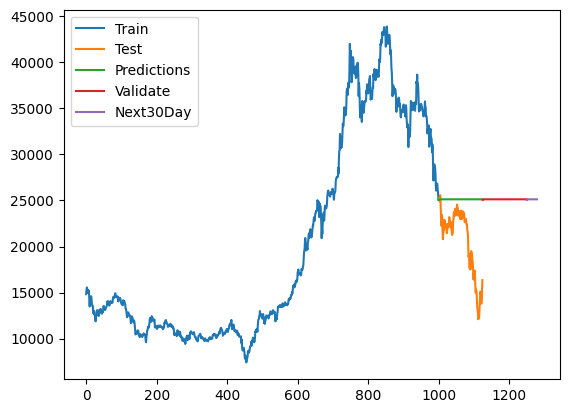

In [40]:
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()